# Camada Prata - CoinMarketCap Cryptocurrency Dataset 2023

Neste arquivo analizaremos os dados que foram obtidos através da plataforma [Kaggle](https://www.kaggle.com/) e tratados no ETL para a camada Prata.

# Análise Exploratória dos Dados Brutos

Nesta seção, utilizaremos Python e suas bibliotecas especializadas para realizar uma análise exploratória completa do dataset tratado no ETL. As principais ferramentas que empregaremos são **Pandas**, **Zipfile**, **Seaborn**, **Numpy** e **Matplotlib**.

## 1. Importação das Bibliotecas Necessárias

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import zipfile

## 2. Carregamento do Dataset

In [18]:
df = pd.read_csv('silver_currencies_data.csv', sep=',', encoding='utf-8')

## 3. Visualização Inicial dos Dados

Examinamos de maneira breve o dataframe utilizado:

In [19]:
df

,cmc_rank,name,symbol,market_pair_count,circulating_supply,total_supply,max_supply,is_active,last_updated,date_added,...,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,fully_dillutted_market_cap,market_cap_by_total_supply,dominance,ytd_price_change_percentage
0,1,Bitcoin,USD,10442,1.947631e+07,1.947631e+07,2.100000e+07,True,2023-09-04 14:57:00+00:00,2010-07-13 00:00:00+00:00,...,-0.151618,-0.286439,-1.011075,-11.014572,-14.243425,-0.602343,5.427690e+11,5.033874e+11,48.3538,55.4648
1,2,Ethereum,USD,7329,1.202177e+08,1.202177e+08,inf,True,2023-09-04 14:57:00+00:00,2015-08-07 00:00:00+00:00,...,-0.231393,-0.394296,-1.167014,-11.139750,-13.168089,-11.297800,1.958790e+11,1.958790e+11,18.8155,35.6717
2,3,Tether USDt,USD,61319,8.290017e+10,8.543720e+10,inf,True,2023-09-04 14:57:00+00:00,2015-02-25 00:00:00+00:00,...,-0.018710,-0.020663,0.011400,0.068201,-0.040030,-0.041019,8.540772e+10,8.540772e+10,7.9604,-0.0037
3,4,BNB,USD,1605,1.538500e+08,1.538500e+08,inf,True,2023-09-04 14:57:00+00:00,2017-07-25 00:00:00+00:00,...,-0.177729,0.479339,-1.317269,-10.890590,-8.878355,-22.728145,3.315388e+10,3.315388e+10,3.1847,-11.7320
4,5,XRP,USD,1061,5.297770e+10,9.998846e+10,1.000000e+11,True,2023-09-04 14:57:00+00:00,2013-08-04 00:00:00+00:00,...,-0.102062,0.156371,-3.182004,-19.955193,7.952432,-1.844853,5.024069e+10,5.023489e+10,2.5567,48.3061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20220,9280,DeFido,USD,2,0.000000e+00,1.000000e+08,1.000000e+08,True,2023-09-04 15:00:00+00:00,2023-08-09 11:56:51+00:00,...,0.000000,0.000000,-1.250495,-81.643051,-81.643051,-81.643051,1.753517e+04,1.753517e+04,0.0000,0.0000
20221,9281,GunBet,USD,2,0.000000e+00,1.000000e+07,1.000000e+07,True,2023-09-04 15:00:00+00:00,2023-08-10 07:15:33+00:00,...,0.000000,0.000000,-8.083381,-98.944749,-98.944749,-98.944749,1.631004e+04,1.631004e+04,0.0000,0.0000
20222,9282,MosesCoin,USD,1,0.000000e+00,1.000000e+12,1.000000e+12,True,2023-09-04 15:00:00+00:00,2023-08-18 13:02:53+00:00,...,0.000000,-0.161447,-48.158507,-73.641855,-73.641855,-73.641855,9.142545e+04,9.142545e+04,0.0000,0.0000
20223,9283,Shibarium Token,USD,1,0.000000e+00,1.000000e+09,1.000000e+09,True,2023-09-04 15:00:00+00:00,2023-08-21 14:14:42+00:00,...,0.000000,0.000000,-0.440193,-6.455954,-6.455954,-6.455954,7.758348e+05,7.758348e+05,0.0000,0.0000


## 4. Informações Estruturais do Dataset

Analisamos os tipos de dados de cada coluna e identificamos valores ausentes:

In [20]:
# Informações gerais sobre o dataset
print("=" * 80)
print("INFORMAÇÕES ESTRUTURAIS DO DATASET")
print("=" * 80)
df.info()

print("\n" + "=" * 80)
print("TIPOS DE DADOS POR COLUNA")
print("=" * 80)
print(df.dtypes)

print("\n" + "=" * 80)
row, col = df.shape
print(f'Número de tuplas: {row} | Número de Colunas: {col}')
print("=" * 80)

INFORMAÇÕES ESTRUTURAIS DO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20225 entries, 0 to 20224
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cmc_rank                     20225 non-null  int64  
 1   name                         20225 non-null  object 
 2   symbol                       20225 non-null  object 
 3   market_pair_count            20225 non-null  int64  
 4   circulating_supply           20225 non-null  float64
 5   total_supply                 20225 non-null  float64
 6   max_supply                   20225 non-null  float64
 7   is_active                    20225 non-null  bool   
 8   last_updated                 20225 non-null  object 
 9   date_added                   20225 non-null  object 
 10  price                        20225 non-null  float64
 11  volume_24h                   20225 non-null  float64
 12  market_cap                   20225 non-

Observamos que existe a nomenclatura `object` como tipo de dado, que no Pandas representa strings ou misturas de tipos.

## 5. Análise de Valores Ausentes

Identificamos e quantificamos valores Nulos e ausentes em cada coluna:

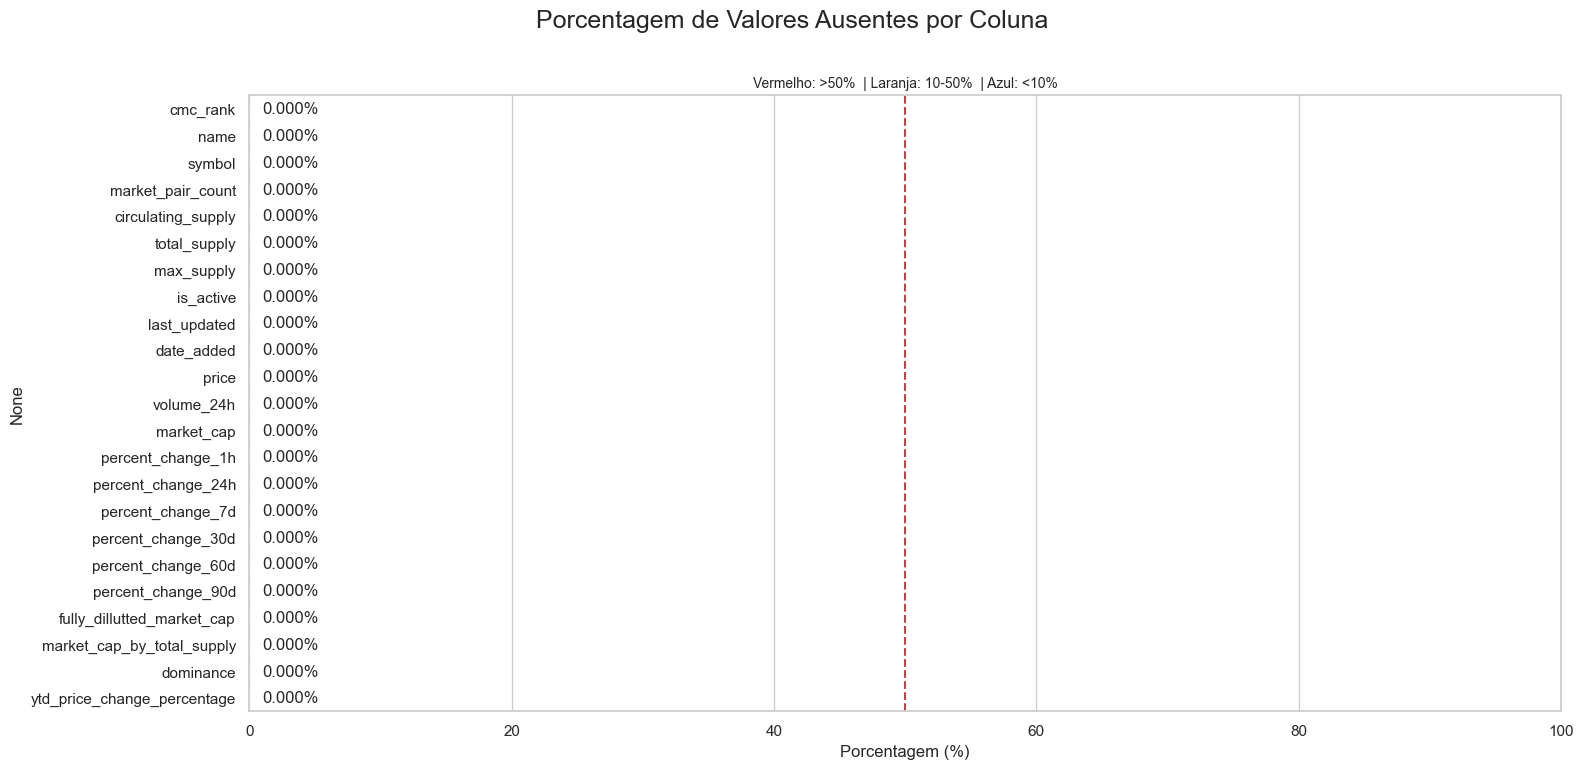

In [21]:
null_perc = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

colors = ['#d9534f' if v > 50 else '#f0ad4e' if v > 10 else '#5bc0de' for v in null_perc.values]

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 8))
ax = sns.barplot(x=null_perc.values, y=null_perc.index, hue=null_perc.index, palette=colors, legend=False)

plt.suptitle("Porcentagem de Valores Ausentes por Coluna", fontsize=18, y=0.96)
ax.set_title("Vermelho: >50%  | Laranja: 10-50%  | Azul: <10%", fontsize=10)
ax.set_xlabel("Porcentagem (%)")
ax.set_xlim(0, 100)

for p in ax.patches:
    w = p.get_width()
    ax.text(w + 1, p.get_y() + p.get_height()/2, f'{w:.3f}%', va='center')

ax.axvline(50, color='darkred', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Observamos que o etl foi bem realizado, já que não se encontram mais valores nulos na tabela.

## 6. Estatísticas Descritivas

Examinamos as estatísticas descritivas das colunas numéricas:

In [22]:

print("=" * 80)
print("ESTATÍSTICAS DESCRITIVAS - COLUNAS NUMÉRICAS")
print("=" * 80)
df.describe()

ESTATÍSTICAS DESCRITIVAS - COLUNAS NUMÉRICAS


/Users/henriquenino/Projetos_Faculdade/sbd2-cryptocurrency-data-analysis/env/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,cmc_rank,market_pair_count,circulating_supply,total_supply,max_supply,price,volume_24h,market_cap,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,fully_dillutted_market_cap,market_cap_by_total_supply,dominance,ytd_price_change_percentage
count,20225.000000,20225.000000,2.022500e+04,2.022500e+04,2.022500e+04,2.022500e+04,2.022500e+04,2.022500e+04,20225.000000,2.022500e+04,2.022500e+04,2.022500e+04,2.022500e+04,2.022500e+04,2.022500e+04,2.022500e+04,20225.000000,2.022500e+04
mean,3728.960939,33.775080,2.645468e+14,2.756373e+16,inf,1.616499e+02,4.363723e+06,9.086838e+07,0.087750,4.392312e+02,4.900382e+07,6.764043e+04,8.068954e+08,3.824055e+08,2.976591e+13,2.931487e+13,0.007828,2.883132e+07
std,2441.492468,679.670767,1.245398e+16,1.235851e+18,NaN,6.016728e+03,1.884639e+08,4.170284e+09,20.836000,3.501207e+04,4.927660e+09,6.129599e+06,1.011538e+11,4.142888e+10,2.577276e+15,2.576509e+15,0.399571,2.034154e+09
min,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.140000e-22,0.000000e+00,0.000000e+00,-95.583328,-9.815875e+01,-9.984594e+01,-1.000000e+02,-1.000000e+02,-1.000000e+02,0.000000e+00,0.000000e+00,0.000000,-1.000000e+02
25%,1689.000000,3.000000,0.000000e+00,1.751392e+07,1.000000e+08,2.010689e-04,1.009521e+02,0.000000e+00,-0.256605,-1.608762e+00,-7.797378e+00,-2.651470e+01,-3.968430e+01,-5.089205e+01,1.447135e+05,6.513543e+04,0.000000,-5.009290e+01
50%,3374.000000,6.000000,0.000000e+00,3.320000e+08,1.000000e+09,4.377096e-03,1.551384e+04,0.000000e+00,-0.126365,-5.046957e-02,-1.629555e+00,-1.287918e+01,-1.841454e+01,-2.651633e+01,1.457192e+06,8.896785e+05,0.000000,-2.529800e+00
75%,5615.000000,14.000000,1.593471e+07,3.300000e+09,1.000000e+15,7.490156e-02,1.134390e+05,1.936761e+05,0.000000,9.759431e-01,1.195330e+00,-9.362853e-01,-3.390338e-01,-2.124451e+00,1.585683e+07,1.194246e+07,0.000000,0.000000e+00
max,9284.000000,61319.000000,9.818468e+17,8.731273e+19,inf,4.756083e+05,1.701102e+10,5.033874e+11,2002.191449,2.874015e+06,4.963326e+11,6.138641e+08,1.423367e+13,5.509612e+12,3.157185e+17,3.157185e+17,48.353800,1.950395e+11


Este comando nos fornece uma visão geral das distribuições, médias, medianas e variações dos principais atributos numéricos do dataset. Essas informações são cruciais para entender o comportamento dos dados e identificar possíveis outliers ou anomalias que já devem ter sido devidamente tratadas.

## 7. Análise de Colunas Categóricas

Identificamos e analisamos as principais colunas categóricas:

In [24]:
print("=" * 80)
print("ANÁLISE DE COLUNAS CATEGÓRICAS")
print("=" * 80)

print("\nTop 10 Símbolos de Criptomoedas Mais Frequentes:")
print(df['symbol'].value_counts().head(10))

print(f"\nTotal de criptomoedas únicas (por nome): {df['name'].nunique()}")
print(f"Total de símbolos únicos: {df['symbol'].nunique()}")

ANÁLISE DE COLUNAS CATEGÓRICAS

Top 10 Símbolos de Criptomoedas Mais Frequentes:
symbol
USD    20225
Name: count, dtype: int64

Total de criptomoedas únicas (por nome): 9193
Total de símbolos únicos: 1


## 8. Análise de Duplicatas

Investigamos a presença de registros duplicados:

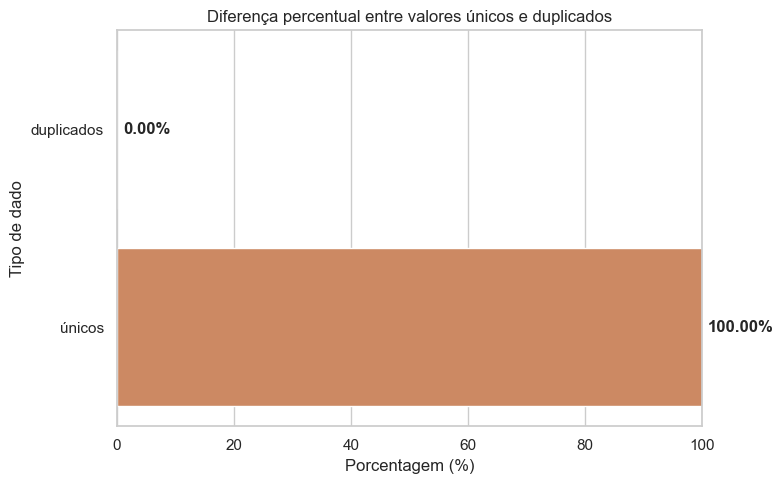

In [25]:
total = len(df)
duplicated = df.duplicated().sum()
unique = total - duplicated

data = {
    'dados': ['duplicados', 'únicos'],
    'total': [duplicated, unique],
}
data['porcentagem'] = [v / total * 100 for v in data['total']]

hue_order = ['duplicados', 'únicos']

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=data,
    x='porcentagem', y='dados',
    hue='dados', hue_order=hue_order,
    dodge=False
)

plt.xlabel("Porcentagem (%)")
plt.ylabel("Tipo de dado")
plt.title('Diferença percentual entre valores únicos e duplicados')

for i, (p, valor) in enumerate(zip(ax.patches, data['porcentagem'])):
    ax.text(p.get_width() + 1, p.get_y() + p.get_height()/2,
            f'{valor:.2f}%', va='center', fontsize=12, fontweight='bold')

plt.xlim(0, 100)
plt.yticks([0, 1], data['dados'])

plt.tight_layout()
plt.show()

Observamos que as alterações no ETL foram devidamente realizadas já que não se encontram valores duplicados no Dataset tratado. 